<a href="https://colab.research.google.com/github/NVietAnh010801/nh-ndi-nkhu-nm-t/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_B%C3%A1o_c%C3%A1o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NHẬN DIỆN KHUÔN MẶT BẰNG ANN**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/baitaptuan14/*.bmp'):
  n = cv2.imread(imgpath)

  if dem%10 == 0:
    x_test.append(n)
    y_test.append(0)
  else:
    x_train.append(n)
    y_train.append(0)
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

y_test = np.array(y_test)
y_train = list(y_train)

In [3]:
print(y_train)
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0 0]


In [4]:
imgNumTrain, _, _, _ = x_train.shape
imgNumTest, _, _, _ = x_test.shape

0


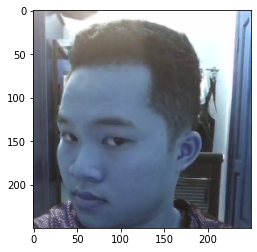

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[6])
print(y_test[6])

0


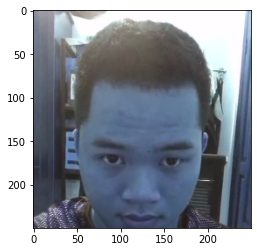

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])
print(y_test[1])

In [9]:
print(x_train.shape)
#print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(60, 250, 250, 3)
(7,)
(7, 250, 250, 3)


In [12]:
from keras.utils.np_utils import to_categorical

x_train = x_train.reshape(60, 187500)
x_test = x_test.reshape(7, 187500)
# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 3) với 3: số phần tử output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(187500,)))  # 784: số tín hiệu đầu vào
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) # Không cần Dropout cũng đc :D?
model.add(Dense(1, activation='softmax')) 
# model.summary()

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_test, y_test))  # verbose = 0: trong qua trinh hoc ko hien thi ra man hinh, = 1: hien thi ..., = 2: hien thi 1/500:..., 2/500:...

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_ac

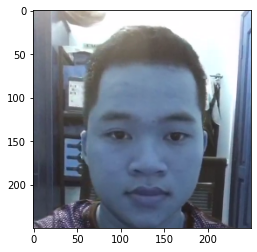

In [19]:
import cv2
img = cv2.imread(r'banVietAnh_0066.jpg')
plt.imshow(img)

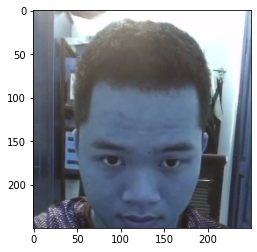

In [22]:
import cv2
img = cv2.imread(r'banVietAnh_0012.jpg')
plt.imshow(img)

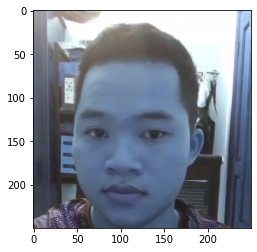

In [23]:
import cv2
img = cv2.imread(r'banVietAnh_0052.jpg')
plt.imshow(img)

(250, 250, 3)


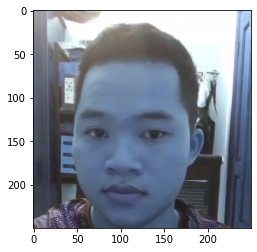

In [24]:
img_re = cv2.resize(img, (250, 250))
plt.imshow(img_re)
print(img_re.shape)

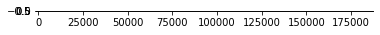

In [25]:
x_test_c = img_re.reshape(1, 187500) 
x_test_c = x_test_c.astype('float32')
x_test_c /= 255
plt.imshow(x_test_c)

In [26]:
y_pred = model.predict(x_test_c)
# print(y_test)
# acc_num_class0 = y_pred[0]
# acc_num_class1 = y_pred[1]
# np.max
print(y_pred)

[[1.]]


In [27]:
y_pred = model.predict(x_test)
print(y_pred)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [28]:
score = model.evaluate(x_test, y_pred, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


In [29]:
model.save('BT Nhan dien khuon mat.h5')

**NHẬN DIỆN KHUÔN MẶT BẰNG CNN**

In [41]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/team/*.bmp'):
  n = cv2.imread(imgpath)
  # print('banVietAnh' in imgpath)
  if dem%10 == 0:
    x_test.append(n)
  else:
    x_train.append(n)
  name1 = 'banVietAnh'
  name2 = 'banninh'
  name3 = 'banthanh'
  if name1 in imgpath:
    y_train.append([0])
  elif name2 in imgpath:
    y_train.append([1])
  elif name3 in imgpath:
    y_train.append([2])
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)
# y_train, y_test chỉ được đánh số từ 0 cho các đối tượng (output): VD HTuan đánh số 0, Huy số 1, Tuan19 số 2

y_test = []
i = 0
while x_train.shape[0] < y_train.shape[0]:
  y_test.append(y_train[i])
  y_train = np.delete(y_train, i)
  i += 9
y_test = np.array(y_test)
y_train = list(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1


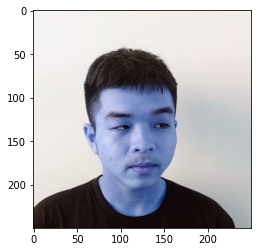

In [42]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[40])
# print(y_train[40])
plt.imshow(x_test[1])
print(y_test[1])

[2]


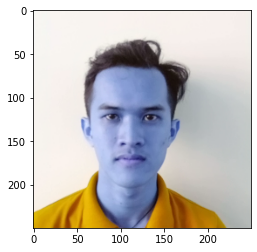

In [43]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[40])
# print(y_train[40])
plt.imshow(x_test[0])
print(y_test[0])

0


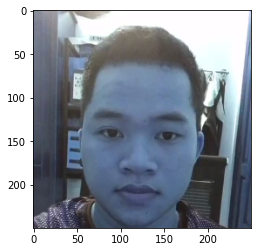

In [44]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[40])
# print(y_train[40])
plt.imshow(x_test[2])
print(y_test[2])

In [45]:
from keras.utils.np_utils import to_categorical

# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

# ...to_categorical(y_train, 10) với 10: số phần tử output (ở đây dùng cifar10 nên output = 10)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [46]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250,250,3)))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         


In [47]:
from keras.layers import Dense
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  # Dense: full-connected (tất cả các tế bào thần kinh đều kết nối với nhau)
model.add(Dense(3, activation='softmax'))

In [48]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)  # lr: learning rate: tốc độ học, momentum: momen động lượng, sự dao động :D?
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 10s 10s/step - loss: 1.8978 - accuracy: 0.3333 - val_loss: 693.9565 - val_accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 6s 6s/step - loss: 679.7894 - accuracy: 0.3333 - val_loss: 290.8715 - val_accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 5s 5s/step - loss: 308.5442 - accuracy: 0.3333 - val_loss: 1.0454 - val_accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 1.0292 - accuracy: 0.3333 - val_loss: 0.8733 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 5s 5s/step - loss: 0.7485 - accuracy: 1.0000 - val_loss: 0.6544 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 5s 5s/step - loss: 0.5923 - accuracy: 1.0000 - val_loss: 0.5187 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 5s 5s/step - loss: 0.4987 - accuracy: 1.0000 - val_loss: 0.4262 - val_accuracy: 1.0000
Epoch 8/15
1/1 [==========================

In [49]:
model.save('Nhan Dien Khuon Mat 3 nguoi.h5')

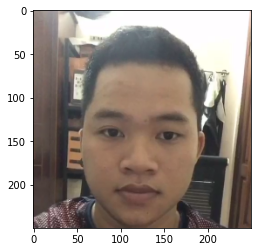

In [52]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banVietAnh_0002.jpg', target_size=(250,250))  
plt.imshow(img)

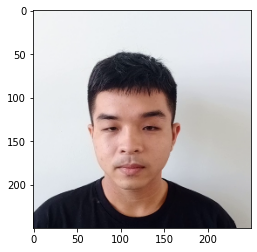

In [55]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banninh_2.bmp', target_size=(250,250))  
plt.imshow(img)

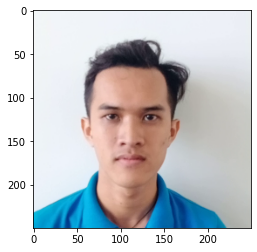

In [56]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banthanh_0002.bmp', target_size=(250,250))  
plt.imshow(img)

In [57]:
img = img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[9.9964738e-01 3.5266197e-04 6.8283486e-09]]


array([0])

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05282009765505791
Test accuracy: 1.0


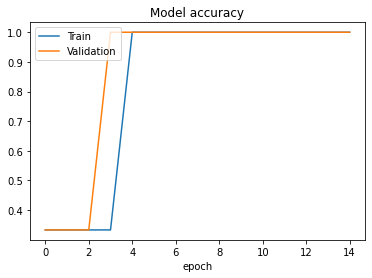

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()